### Задание:
 
1.Загрузить файл hr.csv

2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение) - под переменными имеются ввиду колонки

3.Рассчитать и визуализировать корреляционную матрицу для переменных

4.Визуализировать несколько взаимосвязей между переменными

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными

6.Рассчитать сколько работников работает в каждом департаменте (просто цифрой)

7.Показать распределение сотрудников по зарплатам (визуализировать)

8.Показать распределение сотрудников по зарплатам совместно с департаментами (визуализировать)

9.Сколько сотрудников покинули компанию (просто цифрой; 1 - ушел, 0 - остался)

10.Проверить несколько гипотез для данных,чтобы понять почему сотрудники покидают компанию

11.Загрузить результат (в формате .ipynbноутбука) в репозиторий. Разместить ссылку на репозиторийв лкна сайте

Пояснения к колонкам:

- satisfaction_level - уровень удовлетворенности работой

- last_evaluation - уровень последней оценки работы

- number_project - количество проектов

- average_montly_hours - среднее количество часов в месяц работы

- time_spend_company - шкала от 2 до 10, отражающее время работы в компании

- Work_accident - наличие инцидента на рабочем месте

- left - ушел ли работник или нет

- promotion_last_5years - факт повышения в течение 5 лет

- sales - департамент работника

- salary - уровень зарплаты

### 1 Загрузить файл hr.csv

In [105]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,9

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

In [106]:
data = pd.read_csv('HR.csv')

In [107]:
data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### 2 Рассчитать основные статистики: среднее, медиана, мода, мин/макс, сред.отклонение

In [109]:
data.describe().round(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000
mean,0.613,0.716,3.803,201.050,3.498,0.145,0.238,0.021
std,0.249,0.171,1.233,49.943,1.460,0.352,0.426,0.144
min,0.090,0.360,2.000,96.000,2.000,0.000,0.000,0.000
25%,0.440,0.560,3.000,156.000,3.000,0.000,0.000,0.000
50%,0.640,0.720,4.000,200.000,3.000,0.000,0.000,0.000
75%,0.820,0.870,5.000,245.000,4.000,0.000,0.000,0.000
max,1.000,1.000,7.000,310.000,10.000,1.000,1.000,1.000


In [110]:
data.select_dtypes(include=['object']).mode()

,sales,salary
0,sales,low


## Вывод: 
Показатели __среднее значение__ (mean), __среднее отклонение__ (std), __медиана__ (50%), __минимум__ (min) и __максимум__ (max) для каждого параметра отражены в таблице. 

__Моду__ в данном случае имеет смысл считать для нечисловых значений (sales и salary) - так мы видим, что большинство сотрудников работают в отделе продаж, а самый распространенный уровень зарплаты - низкий

### 3 Рассчитать и визуализировать корреляционную матрицу для переменных

In [111]:
corr_matrix = data.corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


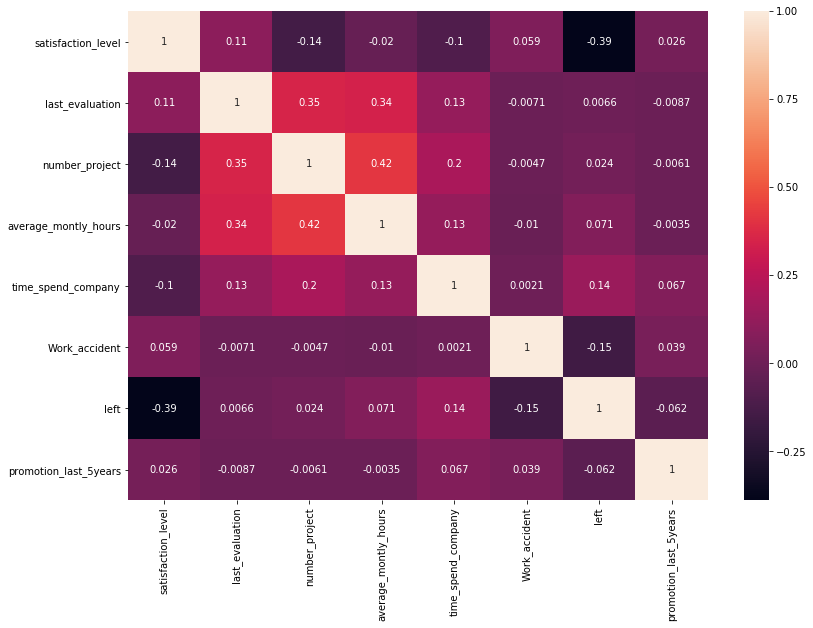

In [112]:
sns.heatmap(corr_matrix, annot=True)

## Вывод: 
На тепловой карте видно, что показатели слабо взаимосвязаны - мало значений близких к 1 или -1. Самая сильная взаимосвязь наблюдается у показателей:

- number_project + average_montly_hours (corr = 0,42);
- number_project + last_evaluation (corr = 0,35);
- average_montly_hours + last_evaluation (corr = 0,34)

Самая сильная обратная взаимосвязь у показателей satisfaction_level + left (corr = -0,39). Эта взаимосвязь могла быть сильнее, если бы подавляющее большинство увольнений были по причине неудовлетворенности от работы, но в целом все логично - часть уволившихся были разочарованы в своей работе

### 4 Визуализировать несколько взаимосвязей между переменными

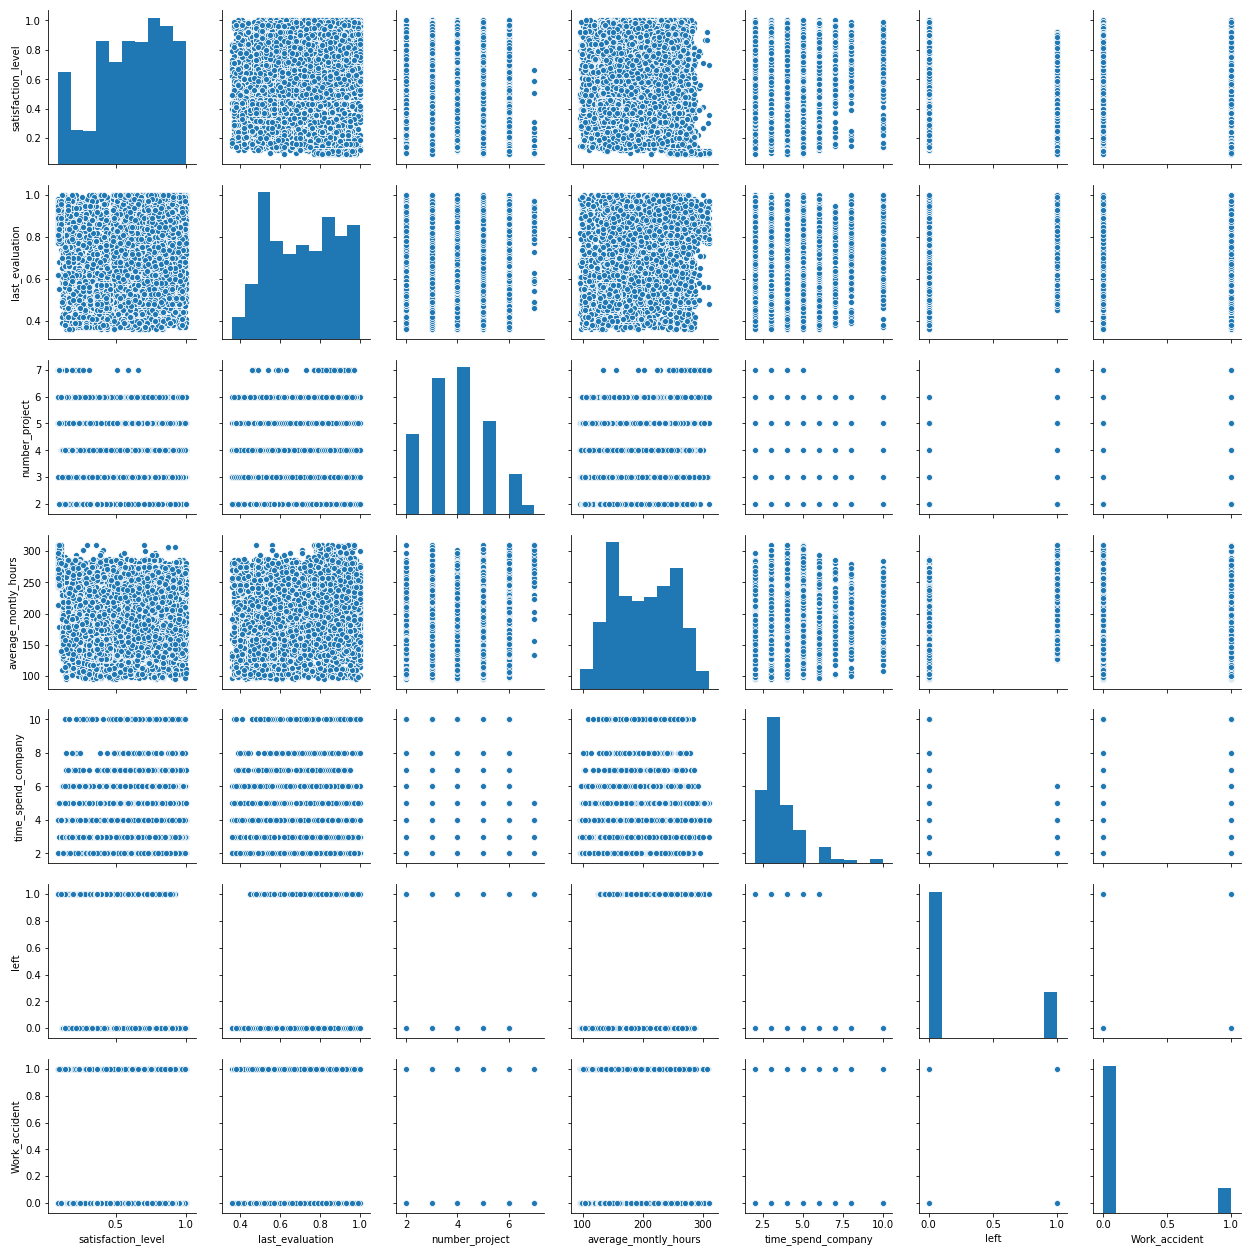

In [113]:
sns.pairplot(data, vars=['satisfaction_level', 'last_evaluation', 'number_project', \
                         'average_montly_hours', 'time_spend_company', 'left', 'Work_accident'], kind='scatter')

## Вывод: 
Из графиков видно, что четкой прямой или обратной корреляции нет ни у одной пары показателей, значит нельзя однозначно утверждать, что один фактор напрямую влияет на другой. Значения с наибольшим коэффициентом корреляции с предыдущего графика (тепловой карты) распределены равномерно по всей коордтнатной плоскости и в них нельзя проследить линейной зависимости. Это говорит об отсутствии взаимосвязи между показателями

### 5 С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [114]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Гипотеза:
у уволившихся людей с низкой и высокой+средней зп был примерно одинаковый satisfaction_level (то есть зп не влияет на уровень удовлетворенности у уволившихся людей)

In [115]:
# Считаем, сколько сотрудников ушло
people_left = data[data['left'] == 1]
people_left['left'].count()

3571

In [116]:
low_salary = people_left.loc[people_left['salary'] == 'low']['satisfaction_level']
not_low_salary = people_left.loc[people_left['salary'] != 'low']['satisfaction_level']

In [117]:
sts.ttest_ind(low_salary, not_low_salary)

Ttest_indResult(statistic=0.32429963083743435, pvalue=0.7457302035891249)

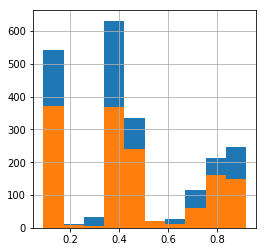

In [118]:
rcParams['figure.figsize'] = 4,4
low_salary.hist()
not_low_salary.hist()

## Вывод: 
P-value составляет 0,74, а значит гипотезу о том, что у уволившихся людей с низкой и высокой+средней зп был примерно одинаковый satisfaction_level (то есть зп не влияет на уровень удовлетворенности) отклонить нельзя. Значит гипотезу можно принять, наверно?

Но изначальные выборки не имеют нормального распределения, поэтому, возможно, критерий Стьюдента применять некорректно в принципе?

### 6 Рассчитать сколько работников работает в каждом департаменте (просто цифрой)

In [119]:
empl_per_department = data.groupby('sales').count()
empl_per_department['n_employees'] = empl_per_department['satisfaction_level']
empl_per_department = empl_per_department['n_employees'].reset_index().sort_values(by='n_employees', ascending=False)
empl_per_department

,sales,n_employees
7,sales,4140
9,technical,2720
8,support,2229
0,IT,1227
6,product_mng,902
5,marketing,858
1,RandD,787
2,accounting,767
3,hr,739
4,management,630


## Вывод: 
В компании 10 департаментов. Больше всего сотрудников в отделах продаж, технического обслуживания и поддержки. Меньше всего в отделе менеджмента

### 7 Показать распределение сотрудников по зарплатам (визуализировать)

In [120]:
salaries = data.groupby('salary').count()
salaries['n_people'] = salaries['satisfaction_level']
salaries = salaries['n_people'].reset_index().sort_values(by='n_people', ascending=False)
salaries

,salary,n_people
1,low,7316
2,medium,6446
0,high,1237


Text(0,0.5,'Number of employees')

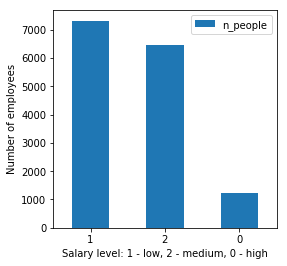

In [121]:
salaries.plot(kind='bar', rot=0)
plt.xlabel('Salary level: 1 - low, 2 - medium, 0 - high')
plt.ylabel('Number of employees')

## Вывод: 
Больше всего сотрудников получают низкую зарплату (7316 чел), немногим меньше людей получают среднюю (6446 чел). Совсем небольшая доля сотрудников получают высокую зарплату (1237 чел)

### 8 Показать распределение сотрудников по зарплатам совместно с департаментами (визуализировать)

In [122]:
salaries_departments_1 = data.groupby(['salary', 'sales']).count()
salaries_departments_1['n_ppl'] = salaries_departments_1['satisfaction_level']
salaries_departments_1 = salaries_departments_1.drop(columns=['satisfaction_level', 'last_evaluation', \
                                                  'number_project', 'average_montly_hours', 'time_spend_company', \
                                                  'Work_accident', 'left', 'promotion_last_5years'])

salaries_departments_1

n_ppl
salary sales             
high   IT              83
       RandD           51
       accounting      74
       hr              45
       management     225
       marketing       80
       product_mng     68
       sales          269
       support        141
       technical      201
low    IT             609
       RandD          364
       accounting     358
       hr             335
       management     180
       marketing      402
       product_mng    451
       sales         2099
       support       1146
       technical     1372
medium IT             535
       RandD          372
       accounting     335
       hr             359
       management     225
       marketing      376
       product_mng    383
       sales         1772
       support        942
       technical     1147

In [123]:
# _salaries_departments_1 = salaries_departments_1.reset_index(level=1, drop=False)
# _salaries_departments_1

In [124]:
salaries_departments_2 = data.groupby(['sales', 'salary']).count()
salaries_departments_2['n_ppl'] = salaries_departments_2['satisfaction_level']
salaries_departments_2 = salaries_departments_2.drop(columns=['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years'])

salaries_departments_2

n_ppl
sales       salary       
IT          high       83
            low       609
            medium    535
RandD       high       51
            low       364
            medium    372
accounting  high       74
            low       358
            medium    335
hr          high       45
            low       335
            medium    359
management  high      225
            low       180
            medium    225
marketing   high       80
            low       402
            medium    376
product_mng high       68
            low       451
            medium    383
sales       high      269
            low      2099
            medium   1772
support     high      141
            low      1146
            medium    942
technical   high      201
            low      1372
            medium   1147

In [125]:
# _salaries_departments_2 = salaries_departments_2.reset_index(level=1, drop=False)
# _salaries_departments_2

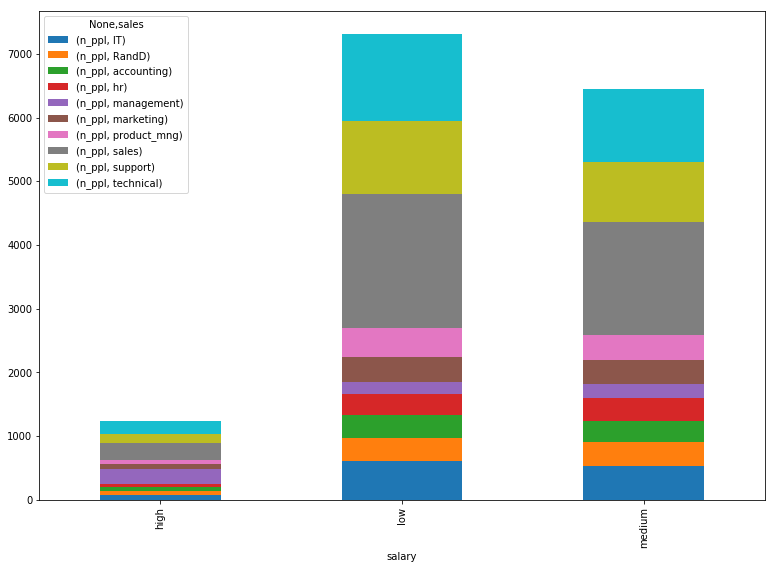

In [126]:
rcParams['figure.figsize'] = 13,9

salaries_departments_1.unstack().plot(kind='bar', stacked=True)

## Вывод 1/2: 
На графике сотрудники сгруппированы по уровню заплаты и внутри каждого уровня по отделам, в которых они работают. Видно, что сотрудников с высокой зп в несколько раз меньше, чем со средней и высокой. Доля зарплат отдела продаж в каждом уровне зп занимает значительную часть - значит у компании много сотрудников именно этого профиля. По высокой зарплате сотрудники продаж уступают только менеджменту - больше всего человек с высокой зп в этом отделе

In [127]:
# rcParams['figure.figsize'] = 4,4
# salaries_departments_1.groupby(['salary']).plot(kind='bar')

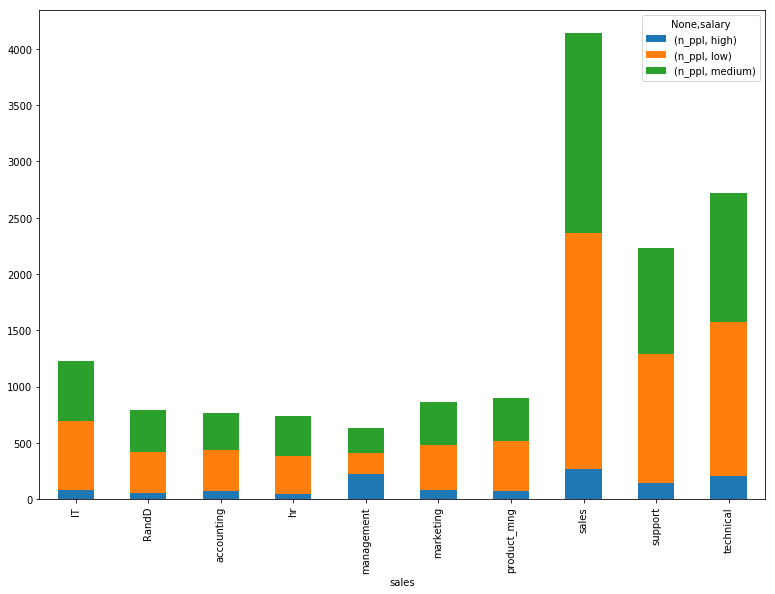

In [128]:
rcParams['figure.figsize'] = 13,9

salaries_departments_2.unstack().plot(kind='bar', stacked=True)

## Вывод 2/2: 
На этом графике сотрудники сгруппированы в первую очередь по отделу и во вторую - по уровню зп. Здесь нагляднее видно, что отдел продаж занимает очень большую долю от числа сотрудников. Тройку замыкают технический отдел и поддержка. Равномерно зарплаты распределены только у менеджмента - у остальных высокий уровеню зп у незначительного числа сотрудников. Средний и низкий уровень зп по отделам примерно равны.

### 9 Сколько сотрудников покинули компанию (просто цифрой; 1 - ушел, 0 - остался)

In [17]:
employees_left = data.groupby('left').count()
employees_left['n_ppl'] = employees_left['satisfaction_level']
employees_left = employees_left.drop(columns=['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales', 'salary'])
employees_left

,n_ppl
left,
0,11428
1,3571


## Вывод:
Компанию покинули 3571 сотрудников, остались 11428 сотрудников